In [7]:
%pip install opencv-python numpy matplotlib -q

Note: you may need to restart the kernel to use updated packages.


# Imports and main logic

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def detect_lightning_flashes_and_plot_brightness(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return []

    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    flash_timestamps = []
    frame_brightness = []

    # First pass: gather brightness values
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        current_frame_brightness = np.mean(gray_frame)
        frame_brightness.append(current_frame_brightness)
    
    # Calculate mean and standard deviation of brightness
    mean_brightness = np.mean(frame_brightness)
    std_brightness = np.std(frame_brightness)
    
    # Remove outliers (exceptionally bright frames)
    upper_limit = mean_brightness + 3 * std_brightness
    filtered_brightness = [b for b in frame_brightness if b <= upper_limit]
    
    # Recalculate mean and standard deviation without outliers
    filtered_mean = np.mean(filtered_brightness)
    filtered_std = np.std(filtered_brightness)
    
    # Set dynamic threshold with lower multiplier
    threshold = filtered_mean + 1.5 * filtered_std

    # Detect flashes based on gathered brightness values
    previous_brightness = None
    for i, current_frame_brightness in enumerate(frame_brightness):
        # Check for significant brightness increase
        if previous_brightness is not None:
            brightness_increase = current_frame_brightness - previous_brightness
            if brightness_increase > 0.5 * filtered_std and current_frame_brightness > threshold:
                timestamp = i / frame_rate  # Convert frame number to seconds
                flash_timestamps.append(timestamp)
                minutes = int(timestamp // 60)
                seconds = int(timestamp % 60)
                print(f"Flash detected at {minutes}:{seconds:02d} minutes")

        previous_brightness = current_frame_brightness

    cap.release()

    # Call the plotting function
    plot_brightness_over_time(frame_rate, frame_brightness, threshold)

    return flash_timestamps

def cut_video_clips(video_path, flash_timestamps):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    output_filename = f"./combined_cuts_{os.path.basename(video_path)}"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_filename, fourcc, frame_rate, (width, height))

    i = 0
    while i < len(flash_timestamps):
        start_timestamp = flash_timestamps[i]
        end_timestamp = start_timestamp

        # Find the end of the current flash sequence
        while i + 1 < len(flash_timestamps) and flash_timestamps[i + 1] - end_timestamp <= 1:
            end_timestamp = flash_timestamps[i + 1]
            i += 1

        # Add 5 seconds before and after the flash sequence
        start_timestamp = max(0, start_timestamp - 3)
        end_timestamp += 3

        start_frame = int(start_timestamp * frame_rate)
        end_frame = int(end_timestamp * frame_rate)

        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

        for _ in range(end_frame - start_frame):
            ret, frame = cap.read()
            if not ret:
                break
            out.write(frame)

        print(f"Added clip {i+1} to combined video")
        i += 1

    out.release()
    cap.release()
    print(f"Saved combined video: {output_filename}")

def plot_brightness_over_time(frame_rate, frame_brightness, threshold):
    # Plot the brightness over time
    time_stamps = [i / frame_rate for i in range(len(frame_brightness))]
    plt.figure(figsize=(12, 6))
    plt.plot(time_stamps, frame_brightness, label='Frame Brightness', color='blue')
    plt.axhline(y=threshold, color='red', linestyle='--', label='Dynamic Brightness Threshold')
    plt.title('Frame Brightness Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Brightness')
    plt.legend()
    plt.grid()
    plt.show()

def process_video(video_path):
    flashes = detect_lightning_flashes_and_plot_brightness(video_path)

    print(f"Processing video: {video_path}")
    print("Detected flash timestamps (minutes:seconds):")
    for timestamp in flashes:
        minutes = int(timestamp // 60)
        seconds = int(timestamp % 60)
        print(f"{minutes}:{seconds:02d}")
    
    print("\n")
    return flashes

# Testing

Flash detected at 23:15 minutes


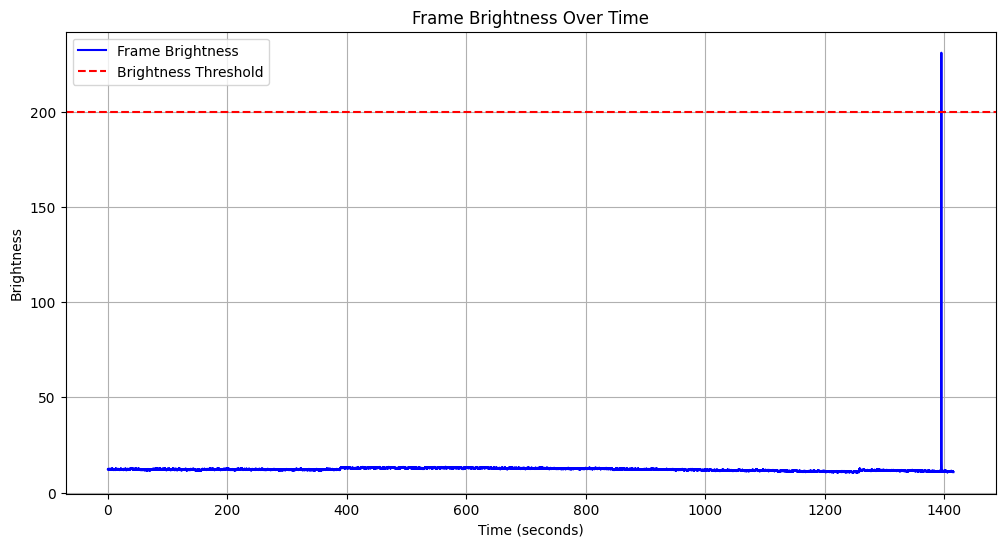

Detected flash timestamps (minutes:seconds):
23:15


In [78]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_161027440.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


Flash detected at 1:03 minutes
Flash detected at 1:04 minutes
Flash detected at 1:04 minutes
Flash detected at 1:28 minutes
Flash detected at 1:29 minutes
Flash detected at 1:29 minutes
Flash detected at 1:29 minutes
Flash detected at 1:29 minutes
Flash detected at 1:29 minutes
Flash detected at 2:17 minutes
Flash detected at 3:59 minutes
Flash detected at 3:59 minutes


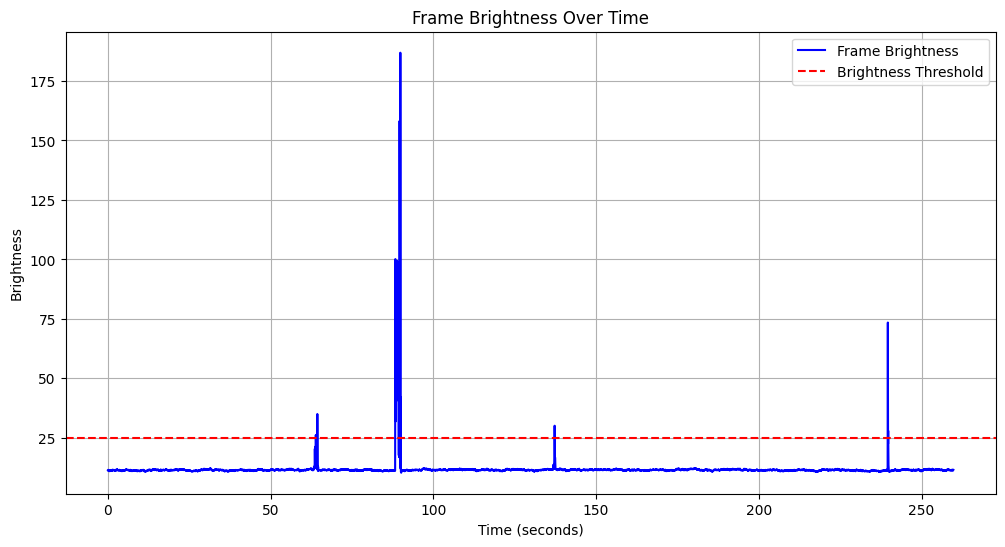

Detected flash timestamps (minutes:seconds):
1:03
1:04
1:04
1:28
1:29
1:29
1:29
1:29
1:29
2:17
3:59
3:59


In [81]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_174334761.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


Flash detected at 1:29 minutes
Flash detected at 1:29 minutes
Flash detected at 1:29 minutes
Flash detected at 1:30 minutes
Flash detected at 1:30 minutes
Flash detected at 1:30 minutes
Flash detected at 1:30 minutes
Flash detected at 1:30 minutes
Flash detected at 1:31 minutes
Flash detected at 1:31 minutes
Flash detected at 1:31 minutes
Flash detected at 1:31 minutes
Flash detected at 1:32 minutes
Flash detected at 2:27 minutes
Flash detected at 3:30 minutes
Flash detected at 3:31 minutes
Flash detected at 4:02 minutes
Flash detected at 5:28 minutes
Flash detected at 5:28 minutes
Flash detected at 5:29 minutes
Flash detected at 5:47 minutes
Flash detected at 8:37 minutes
Flash detected at 8:37 minutes
Flash detected at 8:38 minutes


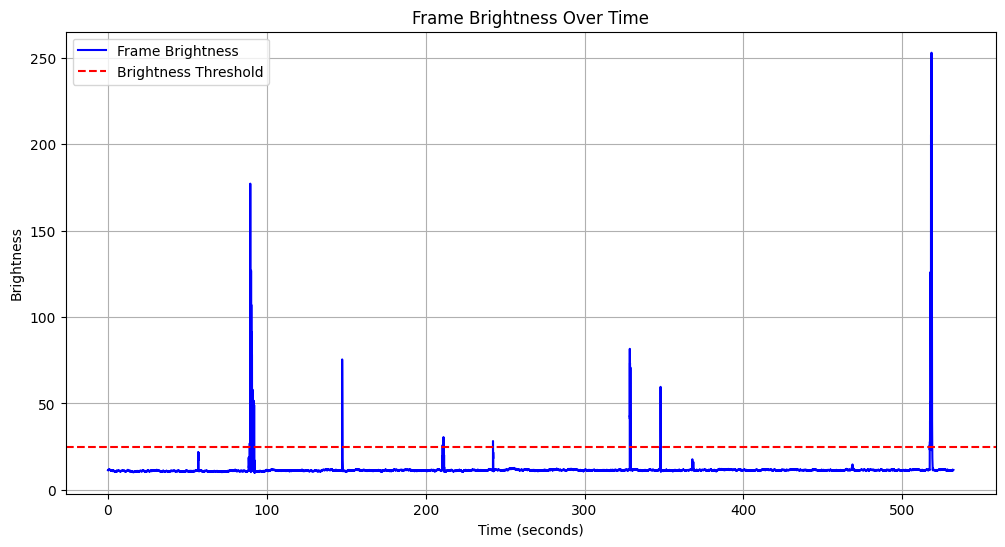

Detected flash timestamps (minutes:seconds):
1:29
1:29
1:29
1:30
1:30
1:30
1:30
1:30
1:31
1:31
1:31
1:31
1:32
2:27
3:30
3:31
4:02
5:28
5:28
5:29
5:47
8:37
8:37
8:38


In [82]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_174441453.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


Flash detected at 2:04 minutes
Flash detected at 2:05 minutes
Flash detected at 3:15 minutes
Flash detected at 3:26 minutes
Flash detected at 3:26 minutes
Flash detected at 3:26 minutes
Flash detected at 8:58 minutes
Flash detected at 12:38 minutes
Flash detected at 13:37 minutes
Flash detected at 13:38 minutes
Flash detected at 13:39 minutes
Flash detected at 13:40 minutes
Flash detected at 13:40 minutes
Flash detected at 13:40 minutes
Flash detected at 13:40 minutes
Flash detected at 13:41 minutes


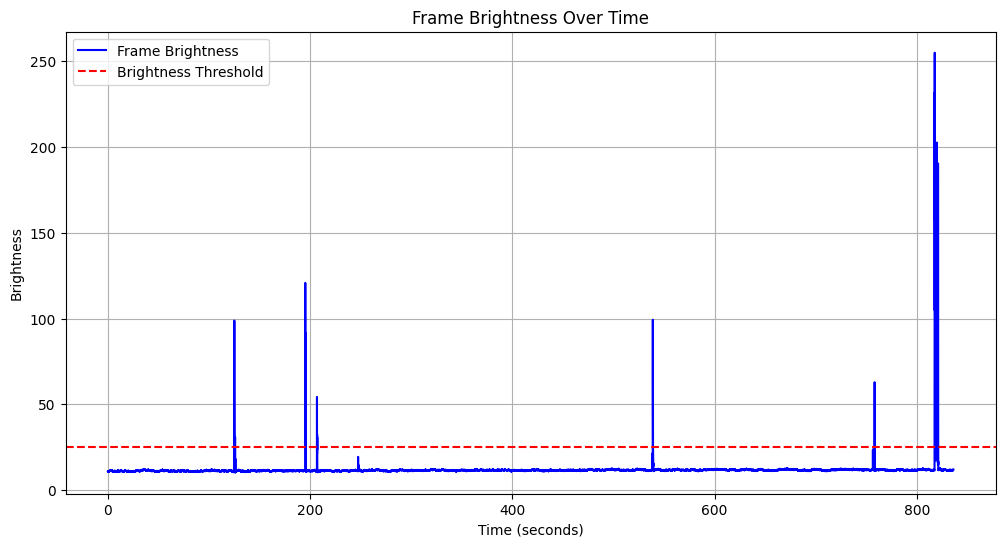

Detected flash timestamps (minutes:seconds):
2:04
2:05
3:15
3:26
3:26
3:26
8:58
12:38
13:37
13:38
13:39
13:40
13:40
13:40
13:40
13:41


In [83]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_174656356.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


Flash detected at 1:06 minutes
Flash detected at 1:06 minutes
Flash detected at 1:47 minutes
Flash detected at 1:47 minutes
Flash detected at 1:47 minutes
Flash detected at 1:48 minutes
Flash detected at 5:22 minutes
Flash detected at 5:24 minutes
Flash detected at 9:10 minutes
Flash detected at 9:10 minutes
Flash detected at 9:11 minutes
Flash detected at 9:11 minutes
Flash detected at 9:11 minutes
Flash detected at 9:11 minutes
Flash detected at 12:59 minutes
Flash detected at 12:59 minutes
Flash detected at 12:59 minutes
Flash detected at 13:00 minutes
Flash detected at 18:49 minutes
Flash detected at 18:50 minutes
Flash detected at 25:29 minutes
Flash detected at 28:54 minutes
Flash detected at 28:54 minutes
Flash detected at 28:54 minutes
Flash detected at 28:54 minutes
Flash detected at 28:55 minutes


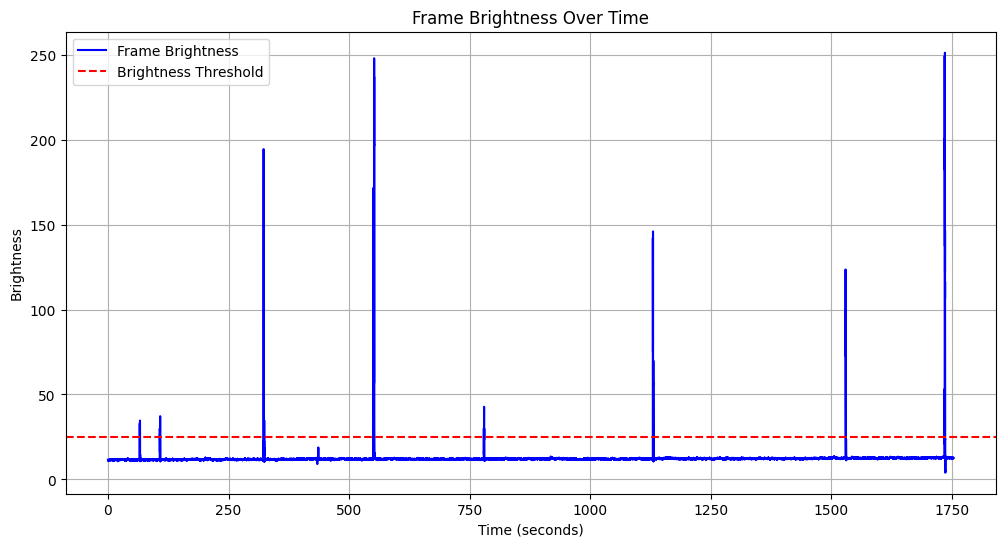

Detected flash timestamps (minutes:seconds):
1:06
1:06
1:47
1:47
1:47
1:48
5:22
5:24
9:10
9:10
9:11
9:11
9:11
9:11
12:59
12:59
12:59
13:00
18:49
18:50
25:29
28:54
28:54
28:54
28:54
28:55


In [84]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_175029730.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


Flash detected at 0:29 minutes
Flash detected at 0:29 minutes
Flash detected at 0:29 minutes
Flash detected at 0:30 minutes
Flash detected at 0:30 minutes
Flash detected at 4:30 minutes
Flash detected at 4:30 minutes
Flash detected at 4:30 minutes
Flash detected at 4:31 minutes
Flash detected at 4:32 minutes
Flash detected at 4:32 minutes
Flash detected at 4:32 minutes


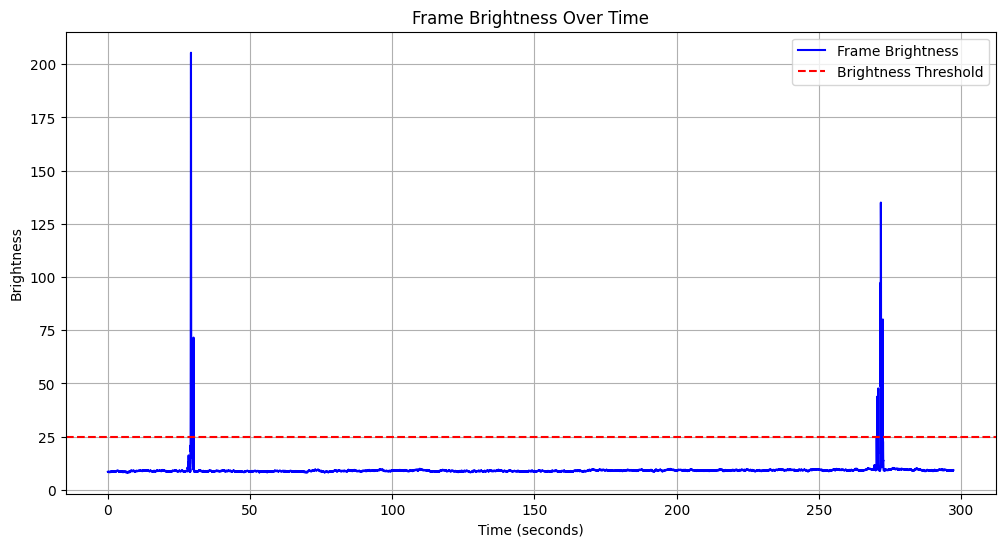

Detected flash timestamps (minutes:seconds):
0:29
0:29
0:29
0:30
0:30
4:30
4:30
4:30
4:31
4:32
4:32
4:32


In [85]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_180051449.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


Flash detected at 3:01 minutes
Flash detected at 3:02 minutes
Flash detected at 4:42 minutes
Flash detected at 4:43 minutes
Flash detected at 4:43 minutes
Flash detected at 4:43 minutes
Flash detected at 4:57 minutes
Flash detected at 4:57 minutes


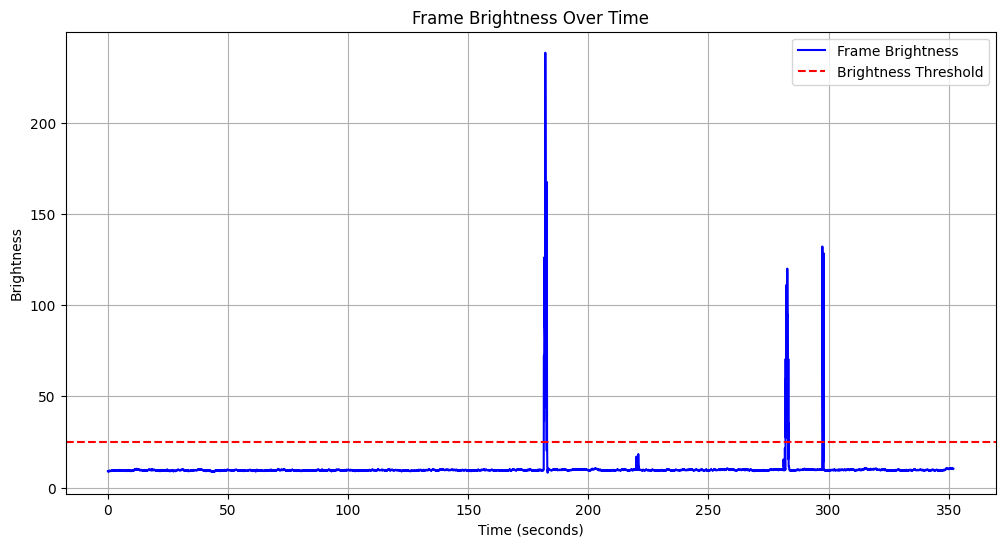

Detected flash timestamps (minutes:seconds):
3:01
3:02
4:42
4:43
4:43
4:43
4:57
4:57


In [86]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_180227402.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


Flash detected at 2:20 minutes
Flash detected at 2:21 minutes
Flash detected at 6:35 minutes
Flash detected at 11:37 minutes
Flash detected at 11:37 minutes
Flash detected at 11:37 minutes
Flash detected at 11:38 minutes
Flash detected at 11:38 minutes


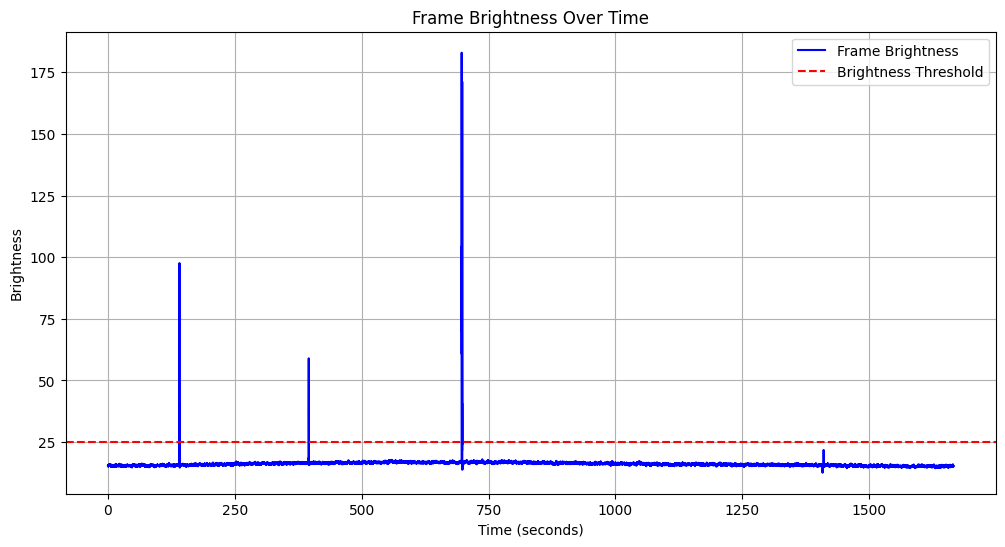

Detected flash timestamps (minutes:seconds):
2:20
2:21
6:35
11:37
11:37
11:37
11:38
11:38


In [87]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_180404869.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


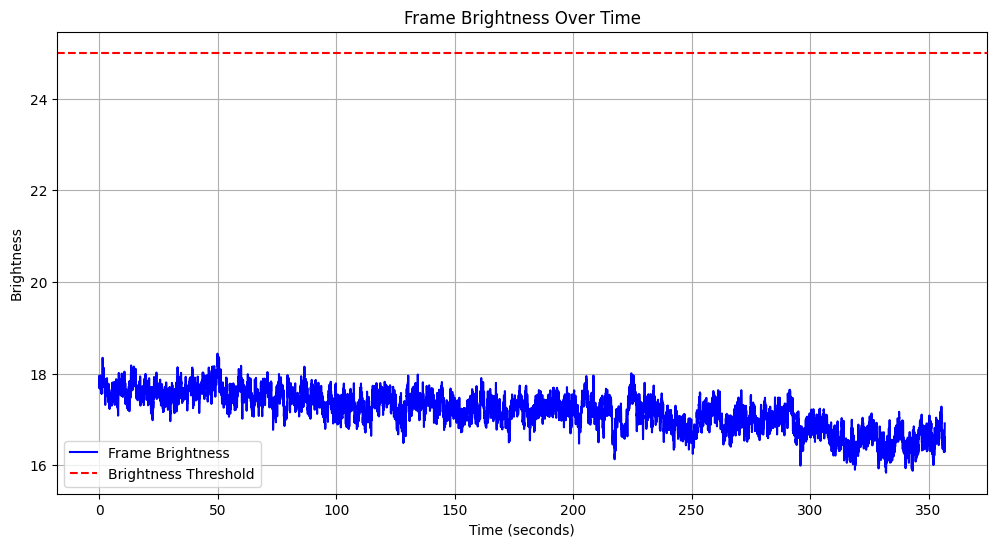

Detected flash timestamps (minutes:seconds):


In [88]:
# Example usage
video_path = 'C:\\Users\\user\\Pictures\\pixel\\slowmo and more\\PXL_20240923_181105972.mp4'
flashes = detect_lightning_flashes_and_plot_brightness(video_path, 25)

# Print all detected flash timestamps in minute:second format
print("Detected flash timestamps (minutes:seconds):")
for timestamp in flashes:
    minutes = int(timestamp // 60)
    seconds = int(timestamp % 60)
    print(f"{minutes}:{seconds:02d}")


# New testing

Flash detected at 1:49 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:07 minutes
Flash detected at 2:08 minutes
Flash detected at 2:08 minutes
Flash detected at 2:08 minutes
Flash detected at 2:09 minutes
Flash detected at 2:09 minutes
Flash detected at 2:09 minutes
Flash detected at 2:09 minutes
Flash detected at 2:09 minutes
Flash detected at 2:10 minutes
Flash detected at 2:10 minutes
Flash detected at 2:10 minutes
Flash detected at 2:10 minutes
Flash detected at 4:00 minutes
Flash detected at 4:27 minutes
Flash detected at 4:27 minutes
Flash detected at 4:28 minutes
Flash detected at 4:28 minutes
Flash detected at 4:28 minutes
Flash detected at 4:28 minutes
Flash detected at 4:28 minutes
Flash detected at 4:28 minutes
Flash detected at 4:28 minutes
Flash de

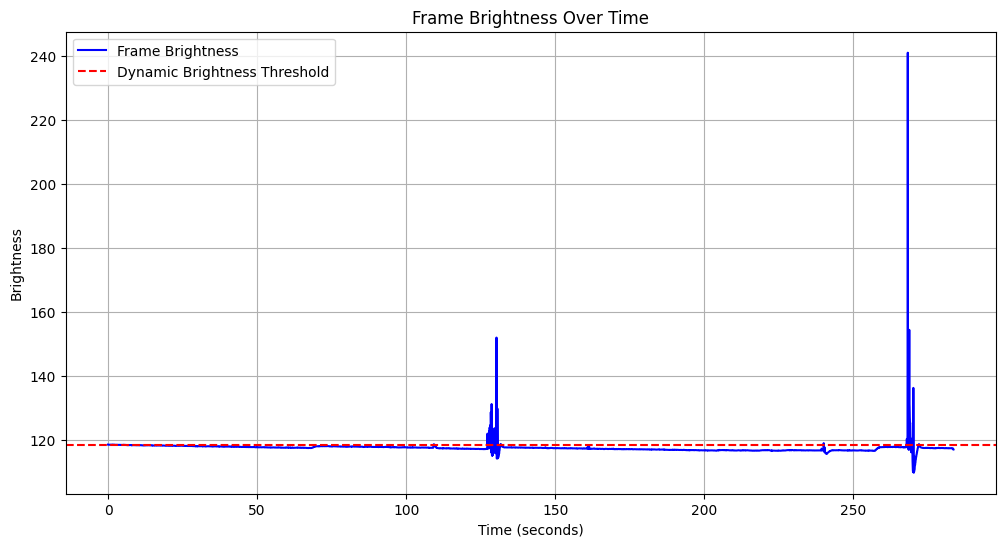

Processing video: C:\Users\user\Pictures\photos\PXL_20241008_141043591.mp4
Detected flash timestamps (minutes:seconds):
1:49
2:07
2:07
2:07
2:07
2:07
2:07
2:07
2:07
2:07
2:08
2:08
2:08
2:09
2:09
2:09
2:09
2:09
2:10
2:10
2:10
2:10
4:00
4:27
4:27
4:28
4:28
4:28
4:28
4:28
4:28
4:28
4:28
4:29
4:29
4:29
4:29
4:29
4:30




In [3]:
# Example usage
import os

folder_path = r'C:\Users\user\Pictures\photos'
video_paths = ["C:\\Users\\user\\Pictures\\photos\\PXL_20241008_141043591.mp4"] # [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.mp4')]

flash_timestamps = process_video(video_paths[0])


In [23]:
flash_timestamps

[109.21373504173035,
 127.21599905959798,
 127.24933658555699,
 127.41602421535207,
 127.5160367932291,
 127.68272442302418,
 127.78273700090122,
 127.88274957877826,
 127.94942463069629,
 127.9827621566553,
 128.1827873124094,
 128.38281246816348,
 128.64951267583558,
 129.24958814309784,
 129.48295082481093,
 129.51628835076997,
 129.616300928647,
 129.8496636103601,
 130.21637639590926,
 130.24971392186828,
 130.2830514478273,
 130.5830891814584,
 240.03018690490185,
 267.83368355471964,
 267.90035860663767,
 268.10038376239174,
 268.16705881430977,
 268.2003963402688,
 268.2337338662278,
 268.633784177736,
 268.667121703695,
 268.70045922965403,
 268.733796755613,
 269.5338973786294,
 269.56723490458836,
 269.6339099565064,
 269.6672474824654,
 269.7005850084244,
 270.1006353199326]

In [31]:
cut_video_clips(video_paths[0], flash_timestamps)

Added clip 1 to combined video
Added clip 22 to combined video
Added clip 23 to combined video
Added clip 39 to combined video
Saved combined video: ./combined_cuts_PXL_20241008_141043591.mp4
